
# Task 2 : Prediction Using Unsupervised ML


### Objective : From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

### Author : Shubham Rohidas Hundare

## Step 1) Data preprocessing

In [145]:
# importing required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [147]:
# reading and printing the required csv file.
df = pd.read_csv(r'E:\Downloads\Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [148]:
# prints first 5 rows
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [149]:
# prints last 5 rows
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [150]:
# prints the size of dataset
df.size

900

In [151]:
# prints the shape of dataset
df.shape

(150, 6)

In [152]:
# prints the minimum values from each columns
df.min()

Id                         1
SepalLengthCm            4.3
SepalWidthCm               2
PetalLengthCm              1
PetalWidthCm             0.1
Species          Iris-setosa
dtype: object

In [153]:
# prints the maximum value from each columns
df.max()

Id                          150
SepalLengthCm               7.9
SepalWidthCm                4.4
PetalLengthCm               6.9
PetalWidthCm                2.5
Species          Iris-virginica
dtype: object

In [154]:
# prints the mean value from each columns
df.mean()

Id               75.500000
SepalLengthCm     5.843333
SepalWidthCm      3.054000
PetalLengthCm     3.758667
PetalWidthCm      1.198667
dtype: float64

In [156]:
# check for null values and prints the counts
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [158]:
# check for duplicate values
df.duplicated().sum()

0

In [159]:
# prints the columns name
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [160]:
# prints all the basic information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [161]:
# prints the datatypes of columns
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [162]:
# count distinct observations over requested axis.
df.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

In [163]:
# prints the uniqe values from columns
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [70]:
# counts the values of each type
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [23]:
# Describes the all statistics of dataset in single table
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [164]:
# prints the correlation between two columns
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


## Step 2 ) Data Visualization

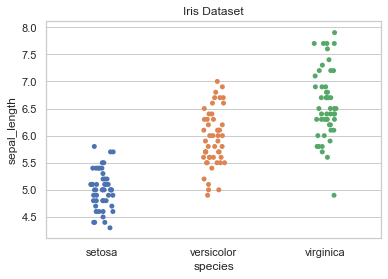

In [54]:
# plotting the relationship between different attributes
sns.set(style = 'whitegrid')
iris = sns.load_dataset('iris')
ax = sns.stripplot(x='species',y='sepal_length',data=iris)
plt.title('Iris Dataset')
plt.show()

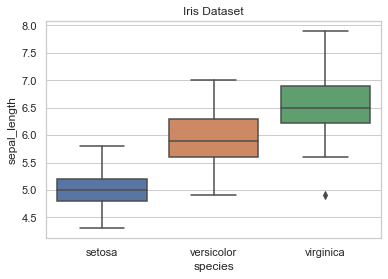

In [165]:
# plotting the box plot
sns.boxplot(x='species',y='sepal_length',data=iris)
plt.title('Iris Dataset')
plt.show()

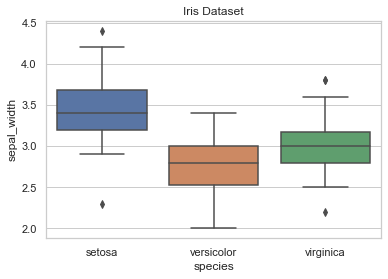

In [56]:
sns.boxplot(x='species',y='sepal_width',data=iris)
plt.title('Iris Dataset')
plt.show()

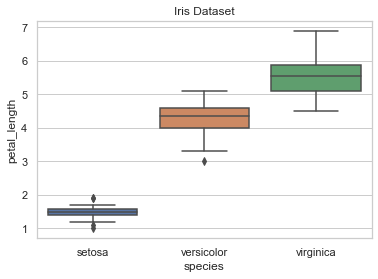

In [57]:
sns.boxplot(x='species',y='petal_length',data=iris)
plt.title('Iris Dataset')
plt.show()

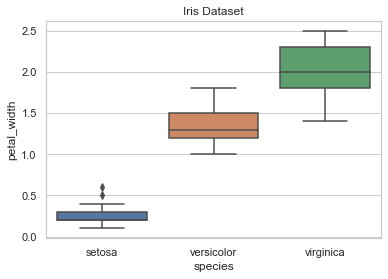

In [58]:
sns.boxplot(x='species',y='petal_width',data=iris)
plt.title('Iris Dataset')
plt.show()

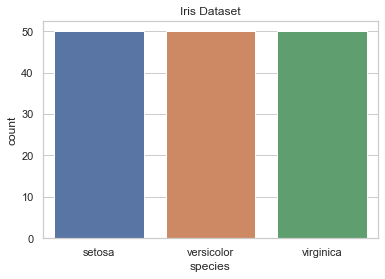

In [166]:
# plotting the count plot
sns.countplot(x='species',data=iris)
plt.title('Iris Dataset')
plt.show()

In [167]:
# dropping the Id column
df = df.drop(['Id'],axis = 1)
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

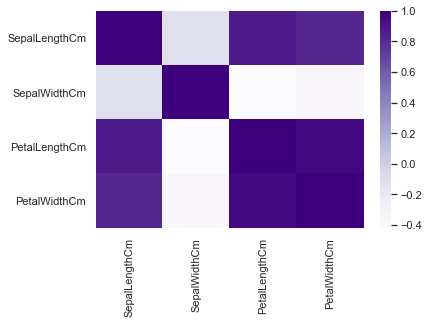

In [168]:
# heat map
sns.heatmap(df.corr(),cmap='Purples')

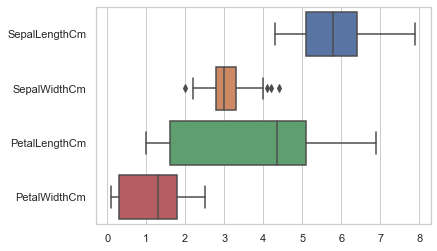

In [169]:
# box plot
sns.boxplot(data=df,orient='h')

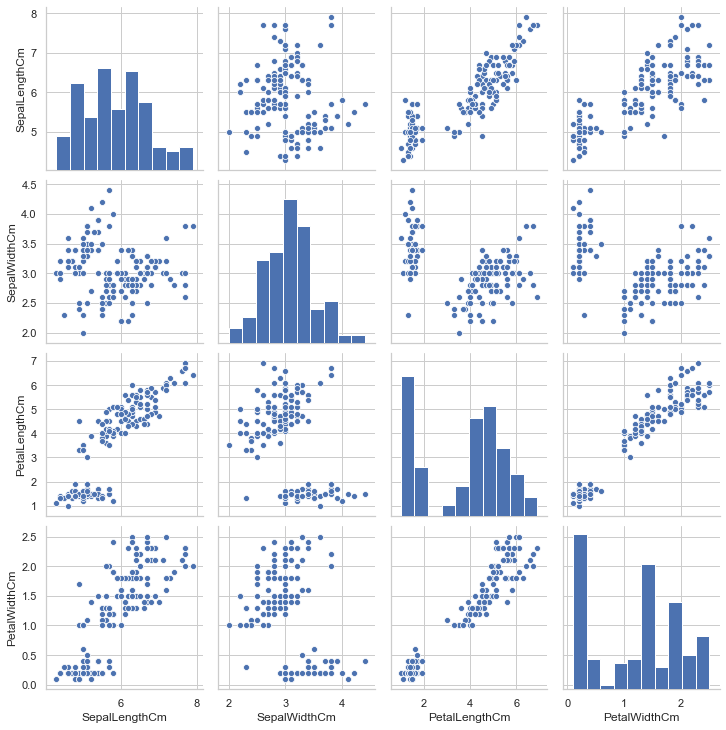

In [118]:
sns.pairplot(df, diag_kind='hist')

###  Step 3) Finding the optimum number of clusters using k-means clustering 

In [120]:
# getting the first and third feature of iris flower
x = df.iloc[:,[0,2]].values
x

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4],
       [5.4, 1.7],
       [4.6, 1.4],
       [5. , 1.5],
       [4.4, 1.4],
       [4.9, 1.5],
       [5.4, 1.5],
       [4.8, 1.6],
       [4.8, 1.4],
       [4.3, 1.1],
       [5.8, 1.2],
       [5.7, 1.5],
       [5.4, 1.3],
       [5.1, 1.4],
       [5.7, 1.7],
       [5.1, 1.5],
       [5.4, 1.7],
       [5.1, 1.5],
       [4.6, 1. ],
       [5.1, 1.7],
       [4.8, 1.9],
       [5. , 1.6],
       [5. , 1.6],
       [5.2, 1.5],
       [5.2, 1.4],
       [4.7, 1.6],
       [4.8, 1.6],
       [5.4, 1.5],
       [5.2, 1.5],
       [5.5, 1.4],
       [4.9, 1.5],
       [5. , 1.2],
       [5.5, 1.3],
       [4.9, 1.5],
       [4.4, 1.3],
       [5.1, 1.5],
       [5. , 1.3],
       [4.5, 1.3],
       [4.4, 1.3],
       [5. , 1.6],
       [5.1, 1.9],
       [4.8, 1.4],
       [5.1, 1.6],
       [4.6, 1.4],
       [5.3, 1.5],
       [5. , 1.4],
       [7. , 4.7],
       [6.4, 4.5],
       [6.9,

### Finding the optimal number cluster using elbow method

In [125]:
from sklearn.cluster import KMeans
wcc = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    wcc.append(kmeans.inertia_)

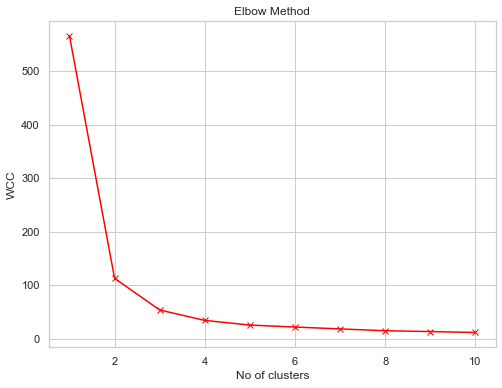

In [129]:
# plotting the resultant onto a line graph, allowing us to observ elbow
plt.figure(figsize=(8,6))
plt.plot(range(1,11),wcc,'bx-',color='red')
plt.xlabel("No of clusters")
plt.ylabel("WCC")
plt.title("Elbow Method")
plt.show()

## Step 4) Training K-Means algorithm on the training dataset

In [131]:
kmeans = KMeans(n_clusters = 3, init ='k-means++',random_state=0)
y_kmeans = kmeans.fit_predict(x)
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

In [134]:
type(x)


numpy.ndarray

In [135]:
type(y_kmeans)

numpy.ndarray

## Step 5)  Visualizing the Clusters

In [136]:
df.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [138]:
kmeans.cluster_centers_

array([[5.00784314, 1.49411765],
       [6.83902439, 5.67804878],
       [5.87413793, 4.39310345]])

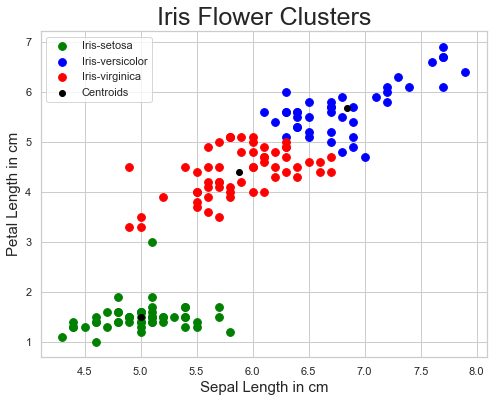

In [170]:
# Visualising the clusters on the basis of first and third columns
plt.figure(figsize=(8,6))
plt.scatter(x[y_kmeans == 0,0],x[y_kmeans == 0,1], s = 60, c = 'green', label="Iris-setosa")
plt.scatter(x[y_kmeans == 1,0],x[y_kmeans == 1,1], s = 60, c = 'blue', label="Iris-versicolor")
plt.scatter(x[y_kmeans == 2,0],x[y_kmeans == 2,1], s = 60, c = 'red', label="Iris-virginica")

# plotting the centroid of clusters
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], c = 'black', label="Centroids")
plt.legend(loc='best')
plt.xlabel("Sepal Length in cm", fontsize=15)
plt.ylabel("Petal Length in cm", fontsize=15)
plt.title("Iris Flower Clusters", fontsize=25)
plt.show()